In [14]:

# heatmap plot

import pandas as pd
import numpy as np

from pathlib import Path

In [15]:
expression_scores_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/full_proteome_measures_z.tsv'
#phospho_measure_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/phospho_measures_z.tsv'
sample_annotation_path = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Searches/patient_annotation_paper_cohort_230626_final.csv"

In [16]:
patients_list = [
'H021-YHPFMB-T2',
'H021-XHP589-M2-R2',
'H021-TPPC3H-M2-Q1',
'H021-UA4J9Y-T1',
'H021-PHLFH6-M4-R2',
'H021-3GHH6S-T1',
'H021-DTSDEX-M6',
'H021-8Z72-T4',
'H021-3GHH6S-T1-R2',
'H021-ENGUHR-T2',
'H021-2A3P6Y-M3-E1',
'H021-TPPC3H-M3'
                ]
meta_data_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801.xlsx'
meta_data = pd.read_excel(meta_data_path)
meta = meta_data[meta_data['Sample name'].isin(patients_list)][['Sample name', 'Paper_pseudo_identifier']].set_index('Sample name').to_dict()['Paper_pseudo_identifier']

In [17]:
ps_scores = pd.read_csv(expression_scores_path,sep='\t')
ps_scores = ps_scores.set_index('Gene names')
#phospho_measure = pd.read_csv(phospho_measure_path,sep='\t')

In [22]:
ps_scores.columns = ps_scores.columns.str.replace('zscore_','')

In [23]:
overlapping = [x for x in ps_scores.columns.to_list() if x in patients_list]

In [24]:
overlapping

['H021-3GHH6S-T1',
 'H021-UA4J9Y-T1',
 'H021-TPPC3H-M3',
 'H021-YHPFMB-T2',
 'H021-8Z72-T4',
 'H021-ENGUHR-T2',
 'H021-DTSDEX-M6',
 'H021-2A3P6Y-M3-E1',
 'H021-TPPC3H-M2-Q1']

In [25]:
proteins = [
'EGFR',
'ERBB2',
'ERBB3',
'FGFR1',
'FGFR4',
'FGFR3;FGFR2',
'FLT1',
'KDR',
'FLT4',
'PDGFRA;FLT3',
'PDGFRB',
'AXL',
'ALK',
'DDR1',
'DDR2',
'KIT',
'RET',
'NTRK2',
'NTRK3',
'IGF1R;INSRR',
'MET',
'MERTK',
'EPHB2',
'EPHA2',
'EPHA7;EPHA10',
'EPHB3',
'EPHA4',
'EPHA5',
'EPHB4',
'EPHA3',
'EFNB2',
'ABL1',
'ABL2',
'PTK2',
'JAK1',
'JAK2',
'JAK3',
'SRC',
'YES1',
'CSK;MATK',
'FGR',
'FYN',
'LYN',
'LCK',
'PLK1',
'AURKB;AURKC',
'AURKA'

]

In [26]:

df = ps_scores[overlapping]

In [27]:
df

,H021-3GHH6S-T1,H021-UA4J9Y-T1,H021-TPPC3H-M3,H021-YHPFMB-T2,H021-8Z72-T4,H021-ENGUHR-T2,H021-DTSDEX-M6,H021-2A3P6Y-M3-E1,H021-TPPC3H-M2-Q1
Gene names,,,,,,,,,
PLEC,-0.734076,0.290793,-0.128328,0.436652,-0.542812,-1.565916,-0.884866,-0.162426,-0.081452
SPARCL1,0.589896,-0.100853,1.539585,0.493357,0.743864,0.629777,0.536293,NaN,-0.434414
CKAP4,0.861556,0.286604,1.749101,2.907200,2.247488,2.215549,1.667577,0.209627,1.955069
SPTBN1,-0.215698,0.083355,0.241154,1.107783,0.509791,-0.060540,-0.342948,-0.735160,0.087202
TMED10,-0.141808,-0.261312,0.397943,4.050988,-1.217902,-0.371096,-0.050672,-0.664610,0.746289
...,...,...,...,...,...,...,...,...,...
STARD4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FOXL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MTF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df = df[df.index.isin(proteins)]

In [29]:
df

,H021-3GHH6S-T1,H021-UA4J9Y-T1,H021-TPPC3H-M3,H021-YHPFMB-T2,H021-8Z72-T4,H021-ENGUHR-T2,H021-DTSDEX-M6,H021-2A3P6Y-M3-E1,H021-TPPC3H-M2-Q1
Gene names,,,,,,,,,
EPHB2,-0.139605,0.809280,0.788270,0.636246,0.495883,0.838168,0.681875,0.735157,-0.216797
EPHA2,-0.136085,0.289620,-0.305607,-0.988995,-1.090901,-0.896405,-0.422041,-0.922179,-0.570026
YES1,-0.312402,-0.679618,-0.107614,1.560983,-0.712297,-0.633369,-0.417785,-0.303701,0.721198
PDGFRB,0.424643,1.189123,0.711639,0.426671,0.335370,0.385550,0.346852,0.647113,0.720876
AXL,-0.237736,-1.212329,-0.618475,-0.346317,0.369955,-0.264192,-0.665034,0.920365,-0.845732
EGFR,-0.032811,-0.971380,-0.212410,1.164179,0.044431,-0.741129,-1.213989,-0.586039,-1.198974
EPHA7;EPHA10,NaN,NaN,0.012297,0.137617,0.401554,-0.281207,-0.856833,NaN,0.813813
SRC,0.152196,-0.154821,-0.085068,0.669978,-1.013958,-0.207233,0.737260,0.920186,-2.298209
CSK;MATK,-1.427063,0.197704,-0.686010,-0.913822,0.817874,0.532292,-0.161821,-0.350656,-1.486221


In [30]:
min_df = df.min().min()
max_df = df.max().max()

In [31]:
df = df.fillna(-4.2)

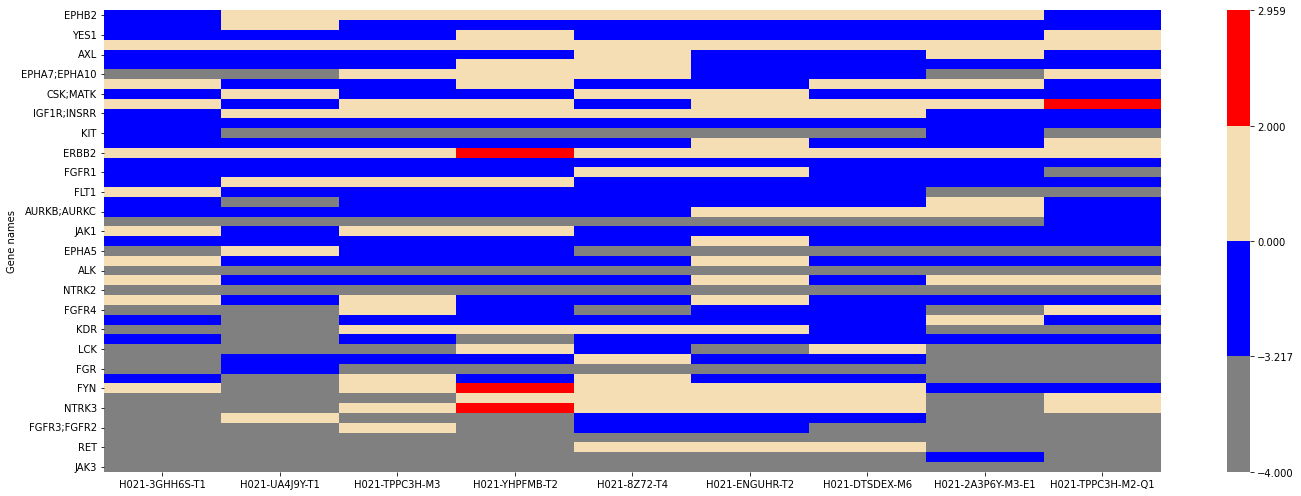

In [33]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True
cmap = colors.ListedColormap(['grey','blue','wheat','red'])
bounds = [-4,min_df,0,2,max_df]
norm = colors.BoundaryNorm(bounds,cmap.N)
# plot heatmap
sns.heatmap(df,cmap=cmap,norm=norm)

plt.savefig('/home/amir/Desktop/FP.svg')
plt.show()